In [1]:
# Install statements
# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [2]:
# Packages
library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


In [3]:
df <- read.csv('Dataset_Numerical_Classes.csv')

In [4]:
head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,0.1883,0.0700,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,0.1629,0.1183,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
18-24,0,Masters degree,34,34,46,47,46,0.1464,0.0700,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,0.1883,0.1183,6,3,0
65+,0,Left school at 18,29,38,35,55,52,0.1464,0.0462,6,0,0


In [5]:
# df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
# df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
# df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))
df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [6]:
# For loops are overrated (leave me alone R is weird okay)

print("age")
unique(df$Age)
print("gender")
unique(df$Gender)
print("education")
unique(df$Education)
print("Nscore")
unique(df$Nscore)
print("Escore")
unique(df$Escore)
print("Cscore")
unique(df$Cscore)
print("Impulsive")
unique(df$Impulsive)
print("Sensation_seeking")
unique(df$Sensation_seeking)
print("Caffeine")
unique(df$Caffeine)
print("Cannabis")
unique(df$Cannabis)
print("Meth")
unique(df$Meth)

[1] "age"


[1] 35-44 25-34 18-24 65+   45-54 55-64
Levels: 18-24 < 25-34 < 35-44 < 45-54 < 55-64 < 65+

[1] "gender"


[1] 0 1

[1] "education"


[1] Professional certificate/ diploma Doctorate degree                 
[3] Masters degree                    Left school at 18                
[5] Left school at 16                 University degree                
[7] College or university dropout     Left school before 16            
[9] Left school at 17                
9 Levels: Left school before 16 < Left school at 16 < ... < Doctorate degree

[1] "Nscore"


[1] 39 29 31 34 43 24 42 33 26 56 28 27 19 22 41 49 32 25 40 51 35 36 46 44 37
[26] 47 23 30 38 18 45 17 53 50 60 21 54 59 48 20 55 16 57 52 58 14 15 13 12

[1] "Escore"


[1] 36 52 45 34 28 38 32 55 40 41 49 29 31 39 27 43 33 16 44 37 51 42 48 46 47
[26] 35 50 30 26 58 53 54 23 22 24 19 20 21 25 56 59 18

[1] "Cscore"


[1] 42 41 34 46 50 52 48 49 43 53 38 36 59 47 31 30 33 35 51 25 37 45 39 44 27
[26] 40 29 54 55 32 56 20 28 26 22 24 23 19 17 21 57

[1] "Impulsive"


[1] 0.1883 0.1629 0.1464 0.1363 0.1146 0.0785 0.0552 0.0106 0.1034 0.0037

[1] "Sensation_seeking"


[1] 0.0700 0.1183 0.1321 0.0462 0.1162 0.1119 0.0897 0.1114 0.0377 0.0546

[1] "Caffeine"


[1] 6 5 4 3 0 1 2

[1] "Cannabis"


[1] 0 4 3 2 1 6 5

[1] "Meth"


[1] 0 3 1 6 4 2 5

In [7]:
# 75% of the sample size
smp_size <- floor(0.75 * nrow(df))

# set the seed to make our partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(df)), size = smp_size)

train <- df[train_ind, ]
test <- df[-train_ind, ]

In [8]:
head(train)
head(test)

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
415,18-24,1,Left school at 18,30,32,42,29,56,0.1883,0.1119,6,6,0
463,18-24,0,University degree,39,34,53,48,48,0.1363,0.1183,5,3,3
179,45-54,0,University degree,44,33,43,48,41,0.1363,0.1183,6,1,0
526,55-64,1,Left school at 18,20,43,38,43,45,0.1629,0.1119,6,0,0
195,25-34,0,University degree,27,48,46,43,45,0.1629,0.0700,4,2,0
938,18-24,1,College or university dropout,40,37,53,33,41,0.1883,0.1119,3,4,0


,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
3,35-44,1,Professional certificate/ diploma,31,45,40,32,34,0.1464,0.1321,6,3,0
7,45-54,1,Masters degree,31,32,43,41,48,0.1883,0.1162,6,1,0
15,55-64,0,Professional certificate/ diploma,27,49,49,39,52,0.0785,0.1119,6,0,0
21,45-54,1,Professional certificate/ diploma,28,45,51,53,33,0.1363,0.1183,6,2,0
22,65+,1,Left school before 16,25,43,38,39,53,0.1883,0.0700,6,1,0
27,55-64,0,Left school at 18,35,28,24,38,46,0.1363,0.0462,6,1,0


In [9]:
print("Train dataset specifications:")
str(train)
print("Test dataset specifications:")
str(test)

[1] "Train dataset specifications:"
'data.frame':	1413 obs. of  13 variables:
 $ Age              : Ord.factor w/ 6 levels "18-24"<"25-34"<..: 1 1 4 5 2 1 1 4 1 4 ...
 $ Gender           : int  1 0 0 1 0 1 1 1 1 0 ...
 $ Education        : Ord.factor w/ 9 levels "Left school before 16"<..: 4 7 7 4 7 5 5 7 6 7 ...
 $ Nscore           : int  30 39 44 20 27 40 30 38 42 49 ...
 $ Escore           : int  32 34 33 43 48 37 43 32 26 35 ...
 $ Oscore           : int  42 53 43 38 46 53 58 41 48 48 ...
 $ Ascore           : int  29 48 48 43 43 33 51 41 44 52 ...
 $ Cscore           : int  56 48 41 45 45 41 45 37 38 43 ...
 $ Impulsive        : num  0.188 0.136 0.136 0.163 0.163 ...
 $ Sensation_seeking: num  0.112 0.118 0.118 0.112 0.07 ...
 $ Caffeine         : int  6 5 6 6 4 3 6 6 6 6 ...
 $ Cannabis         : int  6 3 1 0 2 4 5 1 5 0 ...
 $ Meth             : int  0 3 0 0 0 0 2 0 0 0 ...
[1] "Test dataset specifications:"
'data.frame':	472 obs. of  13 variables:
 $ Age              : Ord.fact

In [23]:
M <- lavCor(train)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
"lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate"

In [11]:
M

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
Age,1.00000000,-0.12196667,0.17546243,-0.150467605,-0.02788125,-0.23929895,0.07019570,0.21193765,0.1395597469,-0.1581440054,0.03994817,-0.46585801,-0.21413146
Gender,-0.12196667,1.00000000,-0.20129931,-0.070392849,-0.06116698,0.13599424,-0.22038676,-0.18390664,-0.0660827751,0.1652529347,0.01119523,0.30157931,0.18148866
Education,0.17546243,-0.20129931,1.00000000,-0.102837319,0.12035190,0.06496818,0.09246585,0.24595285,0.1348312591,-0.0328075960,0.03693888,-0.27139743,-0.17347989
Nscore,-0.15046761,-0.07039285,-0.10283732,1.000000000,-0.43296725,0.01662559,-0.21514520,-0.39867855,-0.1382315378,-0.0043360538,0.01400058,0.10264906,0.18874334
Escore,-0.02788125,-0.06116698,0.12035190,-0.432967246,1.00000000,0.23606577,0.15906490,0.31878011,-0.0628348289,0.1031308407,0.05348347,-0.01923977,-0.12831481
Oscore,-0.23929895,0.13599424,0.06496818,0.016625590,0.23606577,1.00000000,0.03280548,-0.05999592,-0.1319440731,0.2293739645,0.02900374,0.41637002,0.16810353
Ascore,0.07019570,-0.22038676,0.09246585,-0.215145199,0.15906490,0.03280548,1.00000000,0.24960861,0.1672650723,-0.0823730754,-0.01539034,-0.15010414,-0.16180707
Cscore,0.21193765,-0.18390664,0.24595285,-0.398678551,0.31878011,-0.05999592,0.24960861,1.00000000,0.2963585991,-0.0871754839,-0.02260218,-0.27919547,-0.19729815
Impulsive,0.13955975,-0.06608278,0.13483126,-0.138231538,-0.06283483,-0.13194407,0.16726507,0.29635860,1.0000000000,0.0001230195,-0.04704642,-0.17216399,-0.12080617
Sensation_seeking,-0.15814401,0.16525293,-0.03280760,-0.004336054,0.10313084,0.22937396,-0.08237308,-0.08717548,0.0001230195,1.0000000000,0.02306393,0.23679419,0.04684180


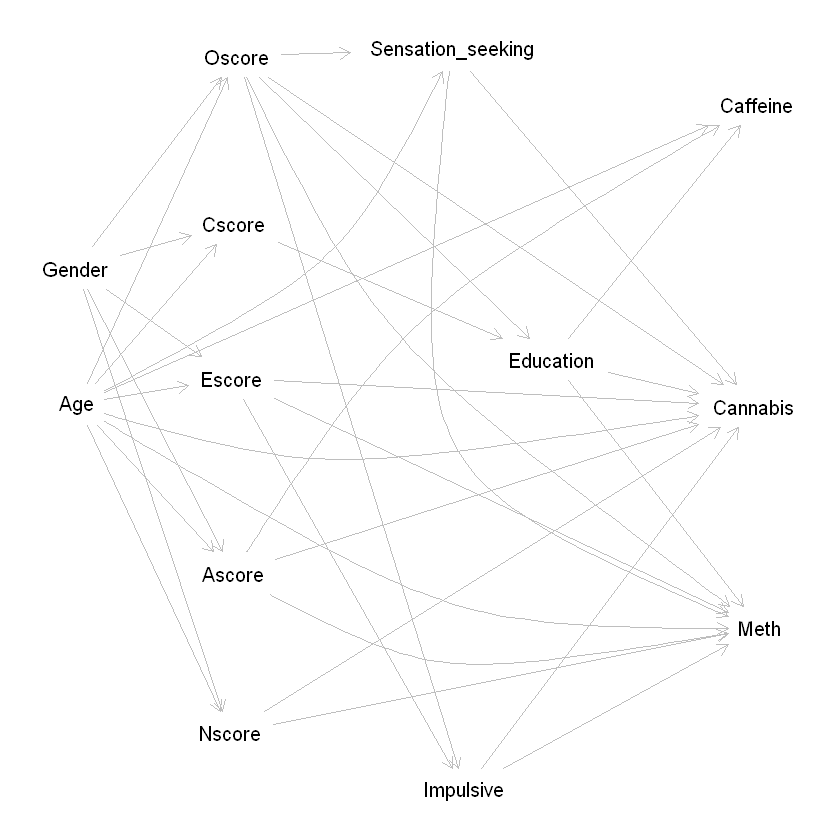

In [12]:
graph <- dagitty('dag {
bb="0,0,1,1"
Age [pos="0.140,0.493"]
Ascore [pos="0.268,0.602"]
Caffeine [pos="0.696,0.299"]
Cannabis [pos="0.694,0.494"]
Cscore [pos="0.269,0.376"]
Education [pos="0.528,0.464"]
Escore [pos="0.266,0.476"]
Gender [pos="0.139,0.405"]
Impulsive [pos="0.457,0.742"]
Meth [pos="0.698,0.637"]
Nscore [pos="0.265,0.705"]
Oscore [pos="0.271,0.268"]
Sensation_seeking [pos="0.447,0.264"]
Age -> Ascore
Age -> Caffeine
Age -> Cannabis [pos="0.332,0.543"]
Age -> Cscore
Age -> Escore
Age -> Meth [pos="0.450,0.644"]
Age -> Nscore
Age -> Oscore
Age -> Sensation_seeking [pos="0.366,0.404"]
Ascore -> Caffeine [pos="0.399,0.432"]
Ascore -> Cannabis
Ascore -> Meth [pos="0.429,0.676"]
Cscore -> Education
Education -> Caffeine
Education -> Cannabis
Education -> Meth
Escore -> Cannabis
Escore -> Impulsive
Escore -> Meth
Gender -> Ascore
Gender -> Cscore
Gender -> Escore
Gender -> Nscore
Gender -> Oscore
Impulsive -> Cannabis
Impulsive -> Meth
Nscore -> Cannabis
Nscore -> Meth
Oscore -> Cannabis
Oscore -> Education
Oscore -> Impulsive
Oscore -> Meth [pos="0.376,0.454"]
Oscore -> Sensation_seeking
Sensation_seeking -> Cannabis
Sensation_seeking -> Meth [pos="0.393,0.550"]
}')
plot(graph)

In [13]:
impliedConditionalIndependencies(graph)

Age _||_ Edct | Cscr, Oscr
Age _||_ Gndr
Age _||_ Impl | Escr, Oscr
Ascr _||_ Cscr | Age, Gndr
Ascr _||_ Edct | Cscr, Oscr
Ascr _||_ Edct | Age, Gndr
Ascr _||_ Escr | Age, Gndr
Ascr _||_ Impl | Escr, Oscr
Ascr _||_ Impl | Age, Gndr
Ascr _||_ Nscr | Age, Gndr
Ascr _||_ Oscr | Age, Gndr
Ascr _||_ Sns_ | Age, Oscr
Ascr _||_ Sns_ | Age, Gndr
Cffn _||_ Cnnb | Age, Ascr, Edct
Cffn _||_ Cscr | Age, Edct, Gndr
Cffn _||_ Cscr | Age, Ascr, Edct
Cffn _||_ Escr | Age, Gndr
Cffn _||_ Escr | Age, Ascr, Cscr, Oscr
Cffn _||_ Escr | Age, Ascr, Edct
Cffn _||_ Gndr | Age, Ascr, Cscr, Oscr
Cffn _||_ Gndr | Age, Ascr, Edct
Cffn _||_ Impl | Escr, Oscr
Cffn _||_ Impl | Age, Gndr, Oscr
Cffn _||_ Impl | Age, Edct, Gndr
Cffn _||_ Impl | Age, Ascr, Cscr, Oscr
Cffn _||_ Impl | Age, Ascr, Edct
Cffn _||_ Meth | Age, Ascr, Edct
Cffn _||_ Nscr | Age, Gndr
Cffn _||_ Nscr | Age, Ascr, Cscr, Oscr
Cffn _||_ Nscr | Age, Ascr, Edct
Cffn _||_ Oscr | Age, Edct, Gndr
Cffn _||_ Oscr | Age, Ascr, Edct
Cffn _||_ Sns_ | Age, Oscr

In [14]:
cg <- coordinates(graph)
fit <- sem( toString(graph,"lavaan"), sample.cov=M, sample.nobs=nrow(train) )
summary(fit)

lavaan 0.6-7 ended normally after 19 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         49
                                                      
  Number of observations                          1413
                                                      
Model Test User Model:
                                                      
  Test statistic                              1238.073
  Degrees of freedom                                39
  P-value (Chi-square)                           0.000

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)
  Ascore ~                                               
    Age                  0.044    0.026    1.684    0.092
  

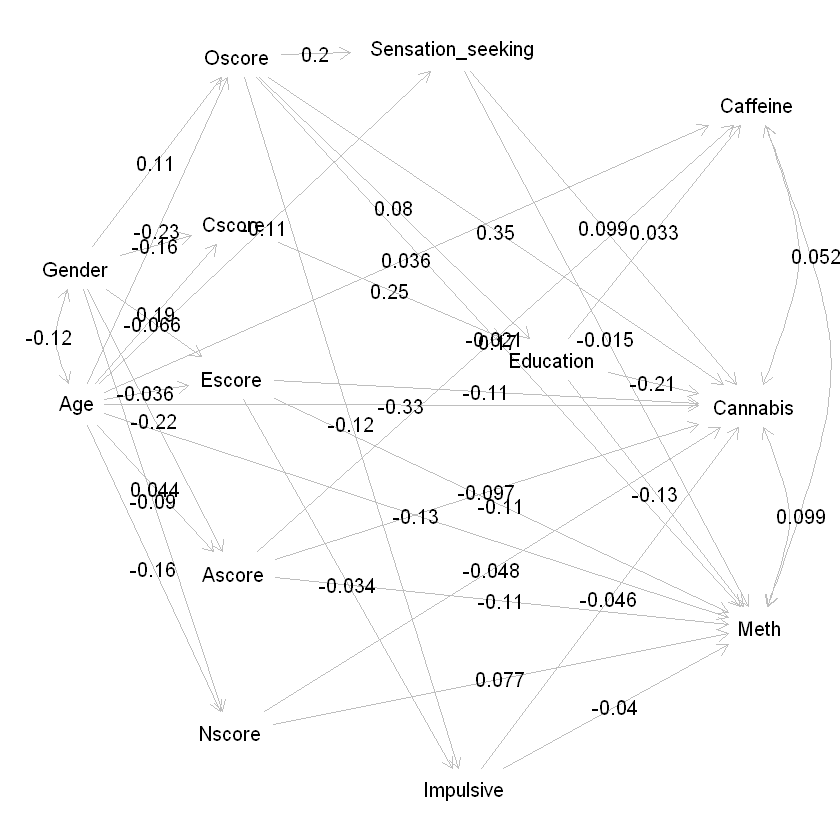

In [15]:
fg <- lavaanToGraph(fit, digits=2)
coordinates(fg) <- cg
plot(fg, show.coefficients=TRUE)

In [22]:
predict(fit,node="Cannabis", data=data.frame(Escore=as.double()))

# Not sure why this does not work
# https://www.bnlearn.com/documentation/man/impute.html

ERROR: Error in .local(object, ...): unused arguments (node = "Cannabis", data = data.frame(Escore = as.double()))


In [ ]:
# localTests( graph, sample.cov=M, sample.nobs=nrow(df) )

In [ ]:
# df$Caffeine <- as.numeric(ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6")))
# df$Cannabis <- as.numeric( ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6")))
# df$Meth <- as.numeric( ordered(df$Meth, levels =c("0","1","2","3","4","5","6")))
# df$Age <- as.numeric( ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+")))
# df$Education <- as.numeric( ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree")))

In [ ]:
# df$Age <- as.double(df$Age) 
# df$Gender <- as.double(df$Gender) 
# df$Nscore <- as.double(df$Nscore) 
# df$Escore <- as.double(df$Escore) 
# df$Oscore <- as.double(df$Oscore) 
# df$Ascore <- as.double(df$Ascore) 
# df$Cscore <- as.double(df$Cscore) 

# str(df)

In [ ]:
# # For loops are overrated (leave me alone R is weird okay)

# print("age")
# unique(df$Age)
# print("gender")
# unique(df$Gender)
# print("education")
# unique(df$Education)
# print("Nscore")
# unique(df$Nscore)
# print("Escore")
# unique(df$Escore)
# print("Cscore")
# unique(df$Cscore)
# print("Impulsive")
# unique(df$Impulsive)
# print("Sensation_seeking")
# unique(df$Sensation_seeking)
# print("Caffeine")
# unique(df$Caffeine)
# print("Cannabis")
# unique(df$Cannabis)
# print("Meth")
# unique(df$Meth)

In [ ]:
# str(train)
# str(test)

In [ ]:
# network <- model2network(toString(graph,"bnlearn"))
# fit <- bn.fit(network, as.data.frame(scale(train)))
# fit

In [ ]:
# # df$Age <- as.double(df$Age) 
# predict(fit,node="Cannabis", data=test,method="bayes-lw")